In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
from epidemic_one_dim import Lattice_1D
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['figure.dpi'] = 150
cmap = mpl.colormaps['autumn']


In [101]:
patch_pop = 1000
number_of_patches = 20
t_max = 100
simple_lattice = Lattice_1D(n=patch_pop, t_max=t_max, k=number_of_patches)
alt_lattice = Lattice_1D(n=patch_pop, t_max=t_max, k=number_of_patches)
simple_res = simple_lattice.simulate(routine='simple')
alt_res = alt_lattice.simulate(routine='alternative')

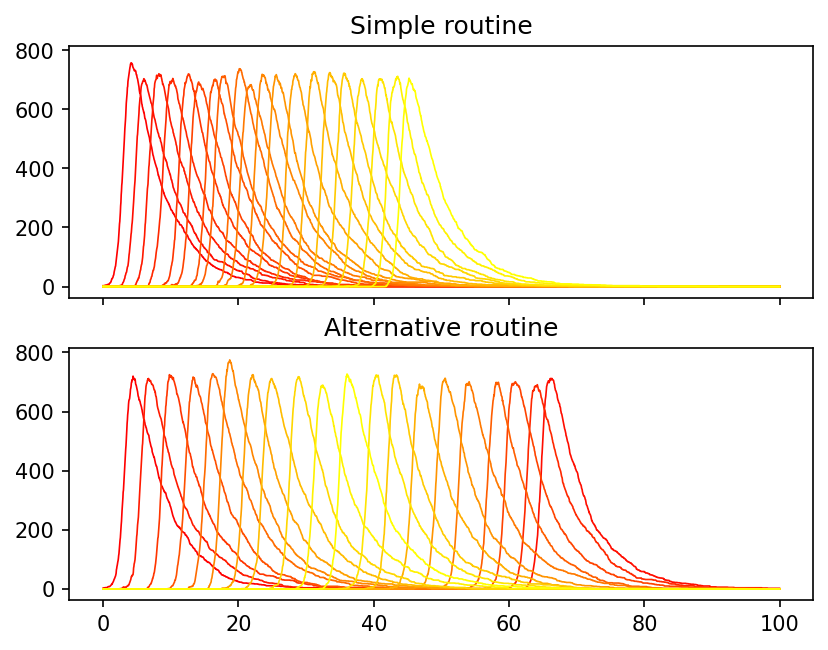

In [107]:
colors = cmap(np.linspace(0, 1, number_of_patches))
fig,ax = plt.subplots(2, 1, sharex=True, sharey=True)
for i in range(number_of_patches):
    param = dict(color=colors[i],linewidth=0.8)
    ax[0].plot(simple_res[-1], simple_res[1][:,i,:].sum(axis=-1), **param)
    ax[1].plot(alt_res[-1], alt_res[1][:,i,:].sum(axis=-1), **param)
ax[0].set_title('Simple routine')
ax[1].set_title('Alternative routine')
plt.show()

In [95]:
alt_res[1].shape

(1560, 10, 1000)

In [93]:
alt_res[1,0,:]

TypeError: tuple indices must be integers or slices, not tuple